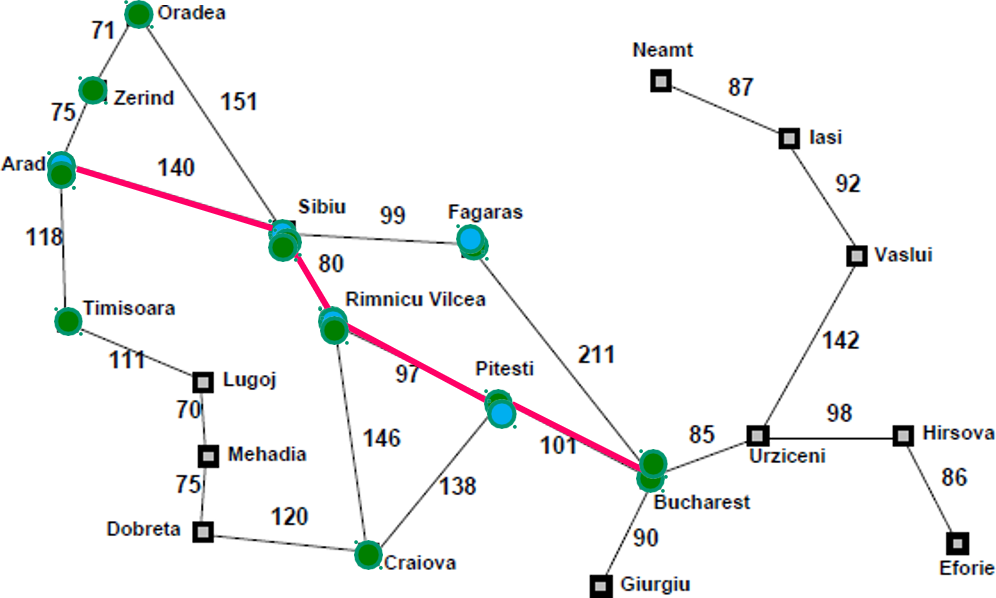

In [ ]:
# Heuristic values (straight-line distances to Bucharest)
h = {
    'Arad': 366,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 176,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 100,
    'Rimnicu Vilcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

# Graph representation (bidirectional with distances)
graph = {
    'Arad': {'Zerind':75, 'Sibiu':140, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu':151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu Vilcea':80},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Rimnicu Vilcea': {'Sibiu':80, 'Pitesti':97, 'Craiova':146},
    'Pitesti': {'Rimnicu Vilcea':97, 'Craiova':138, 'Bucharest':101},
    'Timisoara': {'Arad':118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj':70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta':120, 'Rimnicu Vilcea':146, 'Pitesti':138},
    'Bucharest': {'Fagaras':211, 'Pitesti':101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest':90},
    'Urziceni': {'Bucharest':85, 'Hirsova':98, 'Vaslui':142},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Urziceni':142, 'Iasi':92},
    'Iasi': {'Vaslui':92, 'Neamt':87},
    'Neamt': {'Iasi':87}
}

def a_star_search(start, goal):
    # The open set, as a dictionary of node: f_score for quick retrieval
    open_set = {start: h[start]}
    # Track how we got to each node: came_from[node] = parent_node
    came_from = {}
    # g_score: cost from start along best known path
    #Initially, before exploring any paths, we have no known route to most nodes,
    # so we set their costs to infinity. Infinity effectively means "no valid path found yet.
    g_score = {city: float('inf') for city in graph.keys()}
    g_score[start] = 0

    while open_set:
        # current is the node in open_set with lowest f_score
        #The built-in min function can take an iterable and a key function. When you do min(open_set, key=lambda x: open_set[x]), it:
        #1. Iterates over the keys of open_set (these are the nodes).
        #2. Applies the key function lambda x: open_set[x] to each node x to get its f-score.
        #3. Finds the node with the smallest f-score value.
        current = min(open_set, key=lambda x: open_set[x])

        if current == goal:
          path=reconstruct_path(came_from, current)
          print(g_score[current])
          return path


        # Move current from open to closed set effectively
        del open_set[current]

        # Explore neighbors
        for neighbor, dist in graph[current].items():
            tentative_g_score = g_score[current] + dist
            if tentative_g_score < g_score[neighbor]:
                # This path to neighbor is better than previous one
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + h[neighbor]
                open_set[neighbor] = f_score

    # If we exit the loop, no path was found
    return None

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.insert(0, current)
    return path

# Example usage:
path = a_star_search('Arad', 'Bucharest')
print("Path found by A*:", path)




418
Path found by A*: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


In [ ]:
# Heuristic values (straight-line distances to Bucharest)
h = {
    'Arad': 366,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 176,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 100,
    'Rimnicu Vilcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

# Graph representation (bidirectional with distances)
graph = {
    'Arad': {'Zerind':75, 'Sibiu':140, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu':151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu Vilcea':80},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Rimnicu Vilcea': {'Sibiu':80, 'Pitesti':97, 'Craiova':146},
    'Pitesti': {'Rimnicu Vilcea':97, 'Craiova':138, 'Bucharest':101},
    'Timisoara': {'Arad':118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj':70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta':120, 'Rimnicu Vilcea':146, 'Pitesti':138},
    'Bucharest': {'Fagaras':211, 'Pitesti':101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest':90},
    'Urziceni': {'Bucharest':85, 'Hirsova':98, 'Vaslui':142},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Urziceni':142, 'Iasi':92},
    'Iasi': {'Vaslui':92, 'Neamt':87},
    'Neamt': {'Iasi':87}
}

def greedy_best_first_search(start, goal):
    # open_set: nodes to explore, keyed by heuristic score (h)
    open_set = {start: h[start]}
    came_from = {}  # Keep track of the path

    # For Greedy Best-First Search, we don't need g_scores, but let's still track them for consistency
    g_score = {city: float('inf') for city in graph.keys()}
    g_score[start] = 0

    while open_set:
        # Select the current city with the lowest heuristic value
        current = min(open_set, key=lambda x: open_set[x])

        if current == goal:
            return reconstruct_path(came_from, current)

        # Remove current from open set
        del open_set[current]

        # Expand neighbors
        for neighbor, dist in graph[current].items():
            # In Greedy BFS, we don't consider g_score for choosing the path, but we can still update it
            tentative_g_score = g_score[current] + dist
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score

                # f_score in greedy best-first search is purely the heuristic
                f_score = h[neighbor]
                open_set[neighbor] = f_score

    return None

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.insert(0, current)
    return path

# Example usage:
path = greedy_best_first_search('Arad', 'Bucharest')
print("Path found by Greedy Best-First Search:", path)


Path found by Greedy Best-First Search: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
